In [328]:
import numpy as np
from fuzzy import *
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [329]:
# Rango de la calidad de la comida
x_cal = np.arange(0, 11, 1)
# Rango de la calidad del servicio
x_serv = np.arange(0, 11, 1)
# Rango del porcentaje de propina (del 5% al 25%)
x_prop = np.arange(5, 26, 1)

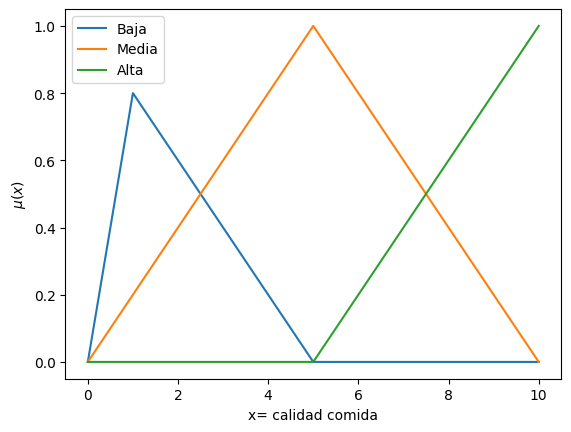

In [330]:
# Funciones de pertenencia para la calidad de la comida
calidad_comida_baja = trimf(x_cal, [0, 0, 5])
calidad_comida_media = trimf(x_cal, [0, 5, 10])
calidad_comida_alta = trimf(x_cal, [5, 10, 10])

# Gráficos para la calidad de la comida
plt.plot(x_cal, calidad_comida_baja, label="Baja")
plt.plot(x_cal, calidad_comida_media, label="Media")
plt.plot(x_cal, calidad_comida_alta, label="Alta")
plt.legend(loc='best')
plt.xlabel('x= calidad comida')
plt.ylabel('$\mu (x)$')
plt.show()

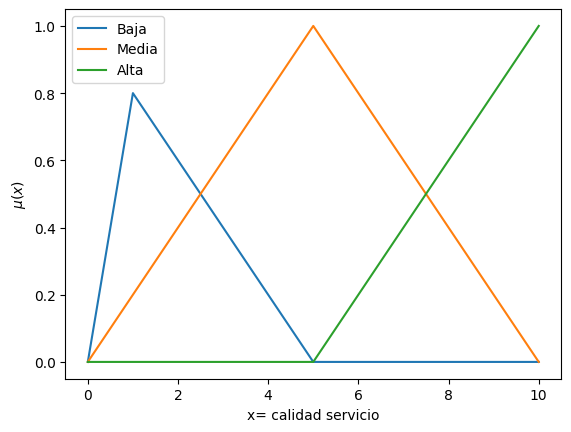

In [331]:
# Funciones de pertenencia para la calidad del servicio
calidad_servicio_baja = trimf(x_serv, [0, 0, 5])
calidad_servicio_media = trimf(x_serv, [0, 5, 10])
calidad_servicio_alta = trimf(x_serv, [5, 10, 10])

# Gráficos para la calidad del servicio
plt.plot(x_serv, calidad_servicio_baja, label="Baja")
plt.plot(x_serv, calidad_servicio_media, label="Media")
plt.plot(x_serv, calidad_servicio_alta, label="Alta")
plt.legend(loc='best')
plt.xlabel('x= calidad servicio')
plt.ylabel('$\mu (x)$')
plt.show()

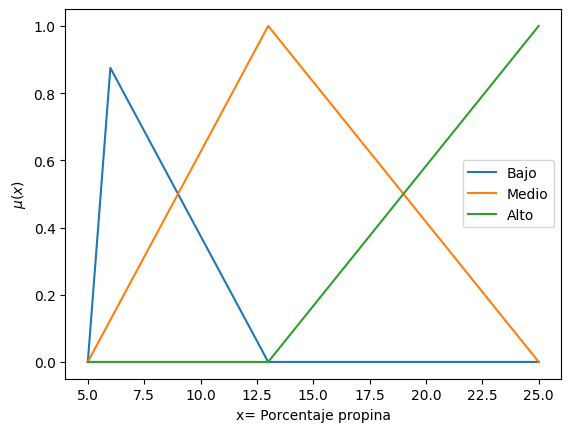

In [332]:
# Funciones de pertenencia para el porcentaje propina
porcentaje_propina_bajo = trimf(x_prop, [5, 5, 13])
porcentaje_propina_medio = trimf(x_prop, [5, 13, 25])
porcentaje_propina_alto = trimf(x_prop, [13, 25, 25])

# Gráficos para el porcentaje propina
plt.plot(x_prop, porcentaje_propina_bajo, label="Bajo")
plt.plot(x_prop, porcentaje_propina_medio, label="Medio")
plt.plot(x_prop, porcentaje_propina_alto, label="Alto")
plt.legend(loc='best')
plt.xlabel('x= Porcentaje propina')
plt.ylabel('$\mu (x)$')
plt.show()

Calidad comida baja: 0.0
Calidad comida media: 0.4
Calidad comida alta: 0.6


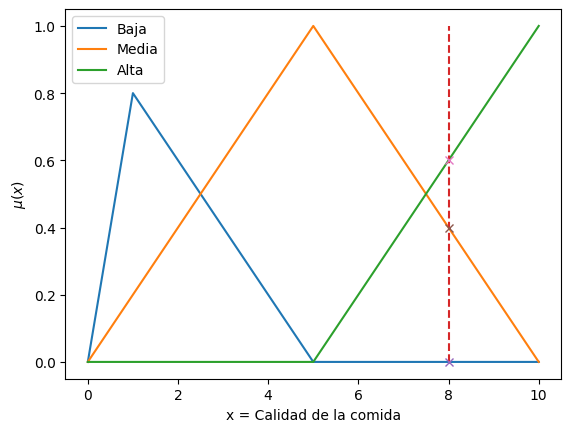

In [333]:
# Introducimos valores para las variables de entrada
cal_comida = 8
cal_servicio = 9

# Calculamos el grado de membresía de cierto valor de entrada para la variable 'calidad de comida'
cal_nivel_b = fuzz.interp_membership(x_cal, calidad_comida_baja, cal_comida)
cal_nivel_m = fuzz.interp_membership(x_cal, calidad_comida_media, cal_comida)
cal_nivel_a = fuzz.interp_membership(x_cal, calidad_comida_alta, cal_comida)

print("Calidad comida baja:", cal_nivel_b)
print("Calidad comida media:", cal_nivel_m)
print("Calidad comida alta:", cal_nivel_a)

plt.plot(x_cal, calidad_comida_baja, label="Baja")
plt.plot(x_cal, calidad_comida_media, label="Media")
plt.plot(x_cal, calidad_comida_alta, label="Alta")
plt.plot([cal_comida, cal_comida], [0.0, 1.0], linestyle="--")
plt.plot(cal_comida, cal_nivel_b, 'x')
plt.plot(cal_comida, cal_nivel_m, 'x')
plt.plot(cal_comida, cal_nivel_a, 'x')
plt.legend(loc='best')
plt.xlabel('x = Calidad de la comida')
plt.ylabel('$\mu (x)$')
plt.show()

Calidad servicio bajo: 0.0
Calidad servicio medio: 0.2
Calidad servicio alto: 0.8


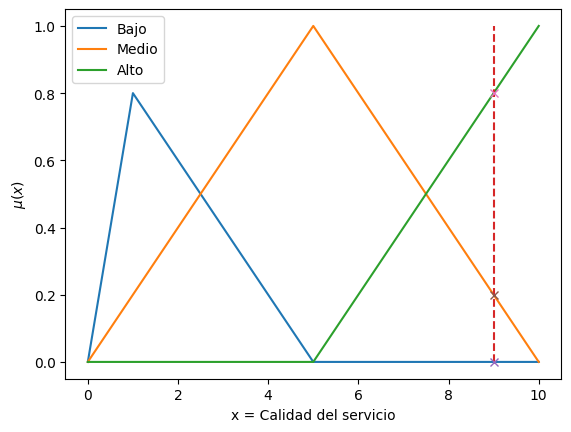

In [334]:
# Calculamos el grado de membresía de cierto valor de entrada para la variable 'calidad del servicio'

servicio_nivel_bajo = fuzz.interp_membership(x_serv, calidad_servicio_baja, cal_servicio)
servicio_nivel_medio = fuzz.interp_membership(x_serv, calidad_servicio_media, cal_servicio)
servicio_nivel_alto = fuzz.interp_membership(x_serv, calidad_servicio_alta, cal_servicio)

print("Calidad servicio bajo:", servicio_nivel_bajo)
print("Calidad servicio medio:", servicio_nivel_medio)
print("Calidad servicio alto:", servicio_nivel_alto)

plt.plot(x_serv, calidad_servicio_baja, label="Bajo")
plt.plot(x_serv, calidad_servicio_media, label="Medio")
plt.plot(x_serv, calidad_servicio_alta, label="Alto")
plt.plot([cal_servicio, cal_servicio], [0.0, 1.0], linestyle="--")
plt.plot(cal_servicio, servicio_nivel_bajo, 'x')
plt.plot(cal_servicio, servicio_nivel_medio, 'x')
plt.plot(cal_servicio, servicio_nivel_alto, 'x')
plt.legend(loc='best')
plt.xlabel('x = Calidad del servicio')
plt.ylabel('$\mu (x)$')
plt.show()

In [335]:
# REGLA 1: "Si la calidad de la comida es baja o la de calidad del servicio es bajo entonces la propina es baja"

# La regla 1 tiene como antecedente "Si la calidad de la comida está baja
# o la de calidad del servicio es bajo"

antecedente_1 = np.fmax(cal_nivel_b, servicio_nivel_bajo)
regla_1 = np.fmin(antecedente_1, porcentaje_propina_bajo)

In [336]:
# REGLA 2: "Si la calidad del servicio es media entonces la propina es media"

# La regla 2 tiene como antecedente "Si la calidad del servicio es media"

antecedente_2 = servicio_nivel_medio
regla_2 = np.fmin(antecedente_2, porcentaje_propina_medio)

In [337]:
# REGLA 3: "Si la calidad de la comida es alta o la de calidad del servicio es alta entonces la propina es alta"

# La regla 3 tiene como antecedente "Si la calidad de la comida es alta
# o la de calidad del servicio es alta"

antecedente_3 = np.fmax(cal_nivel_a, servicio_nivel_alto)
regla_3 = np.fmin(antecedente_3, porcentaje_propina_alto)

In [338]:
# Se hace la unión de los conjuntos resultantes de la aplicación de reglas
union = np.fmax(regla_1, np.fmax(regla_2, regla_3))

print(union)

[0.         0.125      0.2        0.2        0.2        0.2
 0.2        0.2        0.2        0.2        0.2        0.25
 0.33333333 0.41666667 0.5        0.58333333 0.66666667 0.75
 0.8        0.8        0.8       ]


In [339]:
result = defuzz(x_prop, union, 'centroid')

print(
    f"Si la calidad de la comida es {cal_comida} y la calidad del servicio es {cal_servicio}, se proporcionará una propina de ${round(result, 2)}."
)

Si la calidad de la comida es 8 y la calidad del servicio es 9, se proporcionará una propina de $18.78.
